Анализ текста с помощью Python.

In [1]:
# Импорт библиотек

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation, SimpleRNN
from tensorflow.python.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence
from sklearn.model_selection import train_test_split

In [2]:
def replaceMultiple(mainString, toBeReplaces, newString):
    # Iterate over the strings to be replaced
    for elem in toBeReplaces:
        # Check if string is in the main string
        if elem in mainString:
            # Replace the string
            mainString = mainString.replace(elem, newString)
    
    return  mainString

In [3]:
txt = replaceMultiple("Тестовая - запись — верна", ['\n\r', '\n', '\r', '-', '—'] , " ")
print(txt) # Тестовая   запись   верна

Тестовая   запись   верна


In [4]:
def readText(fileName): #функция принимает имя файла
  #f = open(fileName, 'r')        #открываем файла в режиме чтения
  #f = open('C:\Тест\Text_Analiz\Text_Analiz\\' + fileName, 'r', encoding='utf-8')       #открываем файла в режиме чтения
  f = open('C:\Тест\Text_Analiz\Text_Analiz\\' + fileName, 'r')       #открываем файла в режиме чтения  
  text = f.read()                #читаем текст
  #text = replaceMultiple(text, ['\n\r', '\n', '\r', '\\xa0'] , " ") #заменяем переносы и спецсимволы разделителей на пробелы
  return text                    #функция возвращает текст файла

In [5]:
#Подгружаем тексты для обучения
Text_train = []
Text_train.append(readText('Глуховский_Будущее_Train.txt'))
# Text_train.append(readText('Глуховский_Сумерки_Train.txt'))
Text_train.append(readText('Горький_Мещане_Train.txt'))
# Text_train.append(readText('Горький_на_дне_Train.txt'))
Text_train.append(readText('Довлатов_Заповедник_Train.txt'))
#Text_test.append(readText('Довлатов_Зона_Train.txt'))
Text_train.append(readText('Платонов_Дерево_Родины_Train.txt'))
# Text_train.append(readText('Платонов_Чевенгур_Train.txt'))
Text_train.append(readText('Тургенев_Муму_Train.txt'))
# Text_train.append(readText('Тургенев_Первая_Любовь_Train.txt')) 
Text_train.append(readText('Шекспир_Венера_и_Адонис_Train.txt'))
# Text_train.append(readText('Шекспир_Ромео_и_Джулльета_Train.txt')) 
className = ["Глуховский", "Горький", "Довлатов", "Платонов", "Тургенев", "Шекспир"]
nClasses = len(className)
#Загружаем тестовые тексты
Text_test = []
Text_test.append(readText('Глуховский_Метро_2033_Test.txt'))
Text_test.append(readText('Горький_Васса_Железнова_Test.txt'))
Text_test.append(readText('Довлатов_Ремесло_Test.txt')) 
Text_test.append(readText('Платонов_Котлован_Test.txt'))
Text_test.append(readText('Тургенев_Дневник_Лишнего_Человека_Test.txt'))
Text_test.append(readText('Шекспир_Лукреция_Test.txt'))
#Смотрим размеры загруженных выборок
# print(Text_test[2])
for i in range(len(Text_train)):
  print("Длина обучающего текста", className[i], "\t", len(Text_train[i]), "\tПроверочного:", "\t", len(Text_test[i]))
# Для загрузки текстов можно использовать более компактный код используя ‘(‘ в качестве токена для определения нужных файлов:

Длина обучающего текста Глуховский 	 262030 	Проверочного: 	 251065
Длина обучающего текста Горький 	 36530 	Проверочного: 	 80766
Длина обучающего текста Довлатов 	 40757 	Проверочного: 	 62340
Длина обучающего текста Платонов 	 2935 	Проверочного: 	 65954
Длина обучающего текста Тургенев 	 79307 	Проверочного: 	 102084
Длина обучающего текста Шекспир 	 11307 	Проверочного: 	 73186


In [6]:
writers_text=[]
for files in os.listdir():
  if (files.startswith('(')):
    with open(files, 'r') as f:
      text = f.read()
      print("Файл:", files, 'длина:', len(text))
      writers_text.append(text)

In [7]:
Count_max_Words = 20000 #макс. кол-во слов/индексов для обучения текстов
tokenizer = Tokenizer(num_words=Count_max_Words, 
                      filters='!–"—#$%&amp;()*+,-./:;&lt;=>?@[\\]^_`{|}~\t\n\r«»',   # Фильтры из регулярных выражений
                      lower=True, 
                      split=' ', 
                      char_level=False
                     )
tokenizer.fit_on_texts(Text_train) # передаем тексты для получения токенов отсортированных по частоте повторяемости 
                                   # в количестве Count_max_Words
items = list(tokenizer.word_index.items()) #берем индексы слов для просмотра
print(items[:20])

[('и', 1), ('в', 2), ('не', 3), ('я', 4), ('на', 5), ('\xa0', 6), ('что', 7), ('с', 8), ('он', 9), ('как', 10), ('то', 11), ('а', 12), ('его', 13), ('за', 14), ('меня', 15), ('к', 16), ('у', 17), ('из', 18), ('мне', 19), ('но', 20)]


In [8]:
print(tokenizer.word_index['руку']) #позиция/индекс слова в массиве токенов
print(tokenizer.word_docs['руку']) #в скольки источниках встретилось слово
print(tokenizer.word_counts['руку']) #количество повторений слов

204
5
31


In [9]:
dist = list(tokenizer.word_counts.items())
print(dist[:20])
print(Text_train[0][:100])


# [('лиса', 35), ('на', 27709), ('рассвете', 65), ('коралио', 91), ('нежился', 6), ('в', 45508), ('полуденном', 2), ('зное', 3), ('как', 13748), ('томная', 2)]
# «Лиса-на-рассвете»   Коралио нежился в полуденном зное, как томная красавица в сурово хранимом гарем

[('будущее', 10), ('дмитрий', 2), ('алексеевич', 2), ('глуховский', 3), ('бестселлеры', 1), ('дмитрия', 2), ('глуховского', 2), ('на', 1094), ('что', 813), ('ты', 214), ('готов', 14), ('ради', 14), ('вечной', 3), ('жизни', 51), ('уже', 100), ('при', 34), ('нашей', 16), ('будут', 11), ('сделаны', 4), ('открытия', 3)]
Будущее
Дмитрий Алексеевич Глуховский


Бестселлеры Дмитрия Глуховского
НА ЧТО ТЫ ГОТОВ РАДИ ВЕЧНОЙ 


In [10]:
Thres_count = 2 #кол-во раз меньше которого слово нужно исключить из списка  
low_count_words = [w for w,c in tokenizer.word_counts.items() if c < Thres_count] #создаем список слов встречаюихся менее Thres_count 
print(len(low_count_words))
print(low_count_words[:20])
for w in low_count_words: #удаляем такие слова из исходного списка
    del tokenizer.word_index[w]
    del tokenizer.word_docs[w]
    del tokenizer.word_counts[w]
63955
['хранимом', 'брильянтиком', 'вкрапленным', 'нависая', 'тюремщик', 'сейбах', 'склоняли', 'кордебалет', 'прима', 'busca']

14151
['бестселлеры', 'позволят', 'здоровыми', 'бессмертием', 'завести', 'роман', 'культового', 'метро', '2033', 'и\xa0триллера', 'сумерки', 'иностранных', 'миллионными', 'тиражами', 'экранизируются', 'голливуде', 'захватит', 'аст', 'защищены', 'никакая']


['хранимом',
 'брильянтиком',
 'вкрапленным',
 'нависая',
 'тюремщик',
 'сейбах',
 'склоняли',
 'кордебалет',
 'прима',
 'busca']

In [11]:
Word_train_Index = tokenizer.texts_to_sequences(Text_train) #обучающие тесты в индексы
Word_test_Index = tokenizer.texts_to_sequences(Text_test)  #проверочные тесты в индексы
print("Исходный текст:\t\t", Text_train[1] [:87])
print("Он же в виде последовательности индексов:\t", Word_train_Index[1][:20])

Исходный текст:		 Мещане
Максим Алексеевич Горький


«Пьеса "Мещане" – не просто дебют писателя в драмату
Он же в виде последовательности индексов:	 [2963, 5259, 3249, 2964, 2963, 6, 3, 76, 877, 2, 6, 3759, 916, 2498, 5134, 16, 8, 5259, 2964, 2963]


In [12]:
symbs = 0;
words = 0;
for i in range(len(Text_train)):
  print(className[i], "\t", len(Text_train[i]), "символов,", len(Word_train_Index[i]), " слов")
  symbs += len(Text_train[i])
  words += len(Word_train_Index[i])
 
print("\r\nВ сумме:\t", symbs, "символов,", words, "слов")
print()
print("Статистика по обучающим текстам:")
symbs = 0;
words = 0;
for i in range(len(Text_test)):
  print(className[i], "\t", len(Text_test[i]), " символов, ", len(Word_test_Index[i]), " слов")
  symbs += len(Text_test[i])
  words += len(Word_test_Index[i])
  
print("\r\nВ сумме:\t", symbs, "символов,", words, "слов")

Глуховский 	 262030 символов, 32221  слов
Горький 	 36530 символов, 4627  слов
Довлатов 	 40757 символов, 4097  слов
Платонов 	 2935 символов, 453  слов
Тургенев 	 79307 символов, 10087  слов
Шекспир 	 11307 символов, 1014  слов

В сумме:	 432866 символов, 52499 слов

Статистика по обучающим текстам:
Глуховский 	 251065  символов,  12030  слов
Горький 	 80766  символов,  12982  слов
Довлатов 	 62340  символов,  4986  слов
Платонов 	 65954  символов,  6463  слов
Тургенев 	 102084  символов,  11069  слов
Шекспир 	 73186  символов,  6388  слов

В сумме:	 635395 символов, 53918 слов


In [13]:
###########################
# Формирование обучающей выборки по листу индексов слов
# (разделение на короткие векторы)
##########################
def getSetFromIndexes(wordIndexes, xLen, shift):
  xSample = []
  wordsLen = len(wordIndexes)
  index = 0
  print('index + xLen=', index + xLen )
  print('wordsLen=', wordsLen)
  print(len(wordIndexes))
  
  #Идём по всей длине вектора индексов
  #"Выбираем" блоки текст длины xLen и смещаемся вперёд на shift
  while (index + xLen <= wordsLen):
#     print(232323)
    xSample.append(wordIndexes[index:index+xLen])
    index += shift
    
  return xSample
#Тестируем работу функции
arr = [x for x in range(23)]
print("Длина:", len(arr), "\r\n")
print("Входной текст:", arr, "\r\n")
indexes = getSetFromIndexes(arr, 10, 3)
for i in range(len(indexes)):
  print(indexes[i])
print("Общий размер:", len(indexes), "x", len(indexes[0]), '=', len(indexes[0]) * len(indexes))  


Длина: 23 

Входной текст: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22] 

index + xLen= 10
wordsLen= 23
23
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
[12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
Общий размер: 5 x 10 = 50


In [14]:
arr = tf.keras.utils.to_categorical(Word_train_Index[0])
print(len(Word_train_Index[0]))
print(arr.shape)
print(Word_train_Index[0][:10])
print(arr[:20])

32221
(32221, 5259)
[612, 3248, 3249, 2135, 3250, 3251, 5, 7, 28, 434]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [15]:
def createSetsMultiClasses(wordIndexes, xLen, step):
  #Для каждого из классов создаём обучающую/проверочную выборку из индексов
  #print(1)
  nClasses = len(wordIndexes) #задаем количество классов выборки
  xSamples = [] #здесь будет список размером "суммарное кол-во окон во всех текстах*длину окна(например 15779*1000)"
  ySamples = [] #здесь будет список размером "суммарное кол-во окон во всех текстах*вектор длиной по количеству классов" 
  for t, wI in enumerate(wordIndexes):  
    tmp = getSetFromIndexes(wI, xLen, step) #получаем список индексов, разбитый на "кол-во окон * длину окна" 
    xSamples += tmp
    ySamples += [tf.keras.utils.to_categorical(t, nClasses).tolist()] * len(tmp)
  #print(xSamples)
    
  return (np.array(xSamples), np.array(ySamples))    

In [16]:
texts_X = []
texts_Y = []
texts_X.append([x for x in range(23,)]) #Тестовый текст 1
texts_Y.append([x for x in range(100, 23)]) #Тестовый текст 2
# print(texts)
xTrain  = createSetsMultiClasses(texts_X, 10, 3) 
yTrain = createSetsMultiClasses(texts_Y, 10, 3) 
print(xTrain)
print(yTrain)

index + xLen= 10
wordsLen= 23
23
index + xLen= 10
wordsLen= 0
0
(array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
       [ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
       [12, 13, 14, 15, 16, 17, 18, 19, 20, 21]]), array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]]))
(array([], dtype=float64), array([], dtype=float64))


In [17]:
#Задаём базовые параметры
xLen = 7000 # Длина отрезка текста, по которой анализируем, в словах
step = 100 # Шаг разбиения исходного текста на обучающие вектора


In [18]:
texts = []
texts.append([x for x in range(23)]) #Тестовый текст 1
texts.append([x for x in range(100, 123)]) #Тестовый текст 2
xTrain, yTrain  = createSetsMultiClasses(texts, 10, 3) 
print(xTrain)
print(yTrain)

index + xLen= 10
wordsLen= 23
23
index + xLen= 10
wordsLen= 23
23
[[  0   1   2   3   4   5   6   7   8   9]
 [  3   4   5   6   7   8   9  10  11  12]
 [  6   7   8   9  10  11  12  13  14  15]
 [  9  10  11  12  13  14  15  16  17  18]
 [ 12  13  14  15  16  17  18  19  20  21]
 [100 101 102 103 104 105 106 107 108 109]
 [103 104 105 106 107 108 109 110 111 112]
 [106 107 108 109 110 111 112 113 114 115]
 [109 110 111 112 113 114 115 116 117 118]
 [112 113 114 115 116 117 118 119 120 121]]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [19]:
#Задаём базовые параметры
xLen = 2000 #Длина отрезка текста в результирующемвекторе в словах // было 7 000
shift= 100 #Смещение окна для разбиения исходного текста на обучающие вектора
xTrain, yTrain = createSetsMultiClasses(Word_train_Index, xLen, shift) #Формируем обучающую выборку
xTest, yTest = createSetsMultiClasses(Word_test_Index, xLen, shift)    #Формируем тестовую выборку
print(xTrain.shape)
print(yTrain.shape)
print(xTest.shape)
print(yTest.shape)

index + xLen= 2000
wordsLen= 32221
32221
index + xLen= 2000
wordsLen= 4627
4627
index + xLen= 2000
wordsLen= 4097
4097
index + xLen= 2000
wordsLen= 453
453
index + xLen= 2000
wordsLen= 10087
10087
index + xLen= 2000
wordsLen= 1014
1014
index + xLen= 2000
wordsLen= 12030
12030
index + xLen= 2000
wordsLen= 12982
12982
index + xLen= 2000
wordsLen= 4986
4986
index + xLen= 2000
wordsLen= 6463
6463
index + xLen= 2000
wordsLen= 11069
11069
index + xLen= 2000
wordsLen= 6388
6388
(432, 2000)
(432, 6)
(421, 2000)
(421, 6)


In [20]:
xTrain01 = tokenizer.sequences_to_matrix(xTrain.tolist()) #Конвертируем xTrain в список перед передачей методу
xTest01 = tokenizer.sequences_to_matrix(xTest.tolist()) #Конвертируем xTest в список перед передачей методу
print(xTrain01.shape)       #Размер обучающей выборки, сформированной по Bag of Words
print(xTrain01[0][100:120]) #фрагмент набора слов в виде Bag of Words

(432, 20000)
[0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.]


Epoch 1/20
4/4 [==============================] - 0s 88ms/step - loss: 1.5061 - accuracy: 0.4514 - val_loss: 1.6828 - val_accuracy: 0.4822
Epoch 2/20
4/4 [==============================] - 0s 35ms/step - loss: 1.2422 - accuracy: 0.7292 - val_loss: 1.6432 - val_accuracy: 0.4751
Epoch 3/20
4/4 [==============================] - 0s 38ms/step - loss: 1.2063 - accuracy: 0.7407 - val_loss: 1.6284 - val_accuracy: 0.4656
Epoch 4/20
4/4 [==============================] - 0s 43ms/step - loss: 1.1893 - accuracy: 0.7384 - val_loss: 1.6230 - val_accuracy: 0.4513
Epoch 5/20
4/4 [==============================] - 0s 39ms/step - loss: 1.1684 - accuracy: 0.7616 - val_loss: 1.6254 - val_accuracy: 0.3800
Epoch 6/20
4/4 [==============================] - ETA: 0s - loss: 1.1524 - accuracy: 0.75 - 0s 37ms/step - loss: 1.1548 - accuracy: 0.7407 - val_loss: 1.6313 - val_accuracy: 0.3135
Epoch 7/20
4/4 [==============================] - 0s 44ms/step - loss: 1.1349 - accuracy: 0.7222 - val_loss: 1.6337 - val_ac

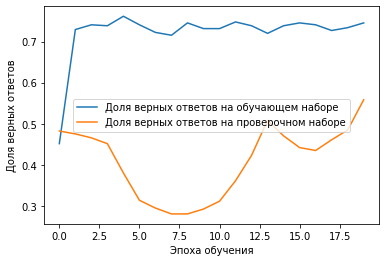

In [21]:
#Создаём полносвязную сеть (FeedForward Neural Network)
model01 = Sequential()
model01.add(BatchNormalization())
model01.add(Dense(30, input_dim=Count_max_Words, activation="relu"))
model01.add(Dropout(0.3))
model01.add(BatchNormalization())
model01.add(Dense(len(Text_train), activation='sigmoid'))
model01.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
#Обучаем сеть на выборке, сформированной по bag of words - xTrain01
history = model01.fit(xTrain01, 
                      yTrain, 
                      epochs=20,
                      batch_size=128,
                      validation_data=(xTest01, yTest))
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [22]:
def prepareTextForRecognition(Text_test, xLen, shift): #функция принимает последовательность индексов, размер окна, смещение окна
  Word_test_Index = tokenizer.texts_to_sequences([Text_test]) 
  print("Source text:",Text_test[:100])
  print("Indexes:",Word_test_Index[0][:10])
  print(len(Word_test_Index[0]))
  sample = getSetFromIndexes(Word_test_Index[0], xLen, shift)
  print("Number of text blocks of xLen:", len(sample))
  xTest = tokenizer.sequences_to_matrix(sample)
  print('sr=', len(Word_test_Index[0]))
 
  return np.array(xTest)

print('test=', len(Text_test[3]))


srcTextBOW = prepareTextForRecognition(Text_test[2], xLen, shift)
#Получаем результаты распознавания класса по блокам слов длины xLen

print('srcTextBOW=', srcTextBOW)

currPred = model01.predict(srcTextBOW)
print(currPred.shape)
print(currPred[:2])
#Определяем номер распознанного класса для каждого блока слов длины xLen
currOut = np.argmax(currPred, axis=1)
print(currOut)

test= 65954
Source text: Ремесло
Сергей Довлатов


Сергей Довлатов – один из наиболее популярных и читаемых русских писателей
Indexes: [3034, 2070, 3034, 2070, 71, 18, 1, 3035, 465, 744]
4986
index + xLen= 2000
wordsLen= 4986
4986
Number of text blocks of xLen: 30
sr= 4986
srcTextBOW= [[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]
(30, 6)
[[0.5585561  0.41207552 0.5922466  0.46486017 0.38847813 0.3382236 ]
 [0.56921536 0.42410547 0.5624513  0.46433374 0.38153756 0.32043633]]
[2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2]


In [23]:
arr = np.array([[0.1, 0.3, 0.2, 0.6, 0.9],
                [0.7, 0.3, 0.2, 0.6, 0.5],
                [0.8, 0.3, 0.9, 0.6, 0.3]])
print(np.argmax(arr, axis=1))

srcTextBOW = prepareTextForRecognition(Text_test[3], xLen, shift)
#Получаем результаты распознавания класса по блокам слов длины xLen



currPred = model01.predict(srcTextBOW)
print(currPred.shape)
print(currPred[:2])
#Определяем номер распознанного класса для каждого блока слов длины xLen
currOut = np.argmax(currPred, axis=1)

print(currOut)

[4 0 2]
Source text: Котлован
Андрей Платонович Платонов


Андрей Платонов был подлинным сыном революции, принял ее сразу
Indexes: [2094, 5636, 2094, 5636, 59, 4448, 1278, 24, 258, 1]
6463
index + xLen= 2000
wordsLen= 6463
6463
Number of text blocks of xLen: 45
sr= 6463
(45, 6)
[[0.55166847 0.37877154 0.43283242 0.44338608 0.4629925  0.28306946]
 [0.5633391  0.38504994 0.4349167  0.44747704 0.457863   0.28661147]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]


In [24]:
arr = np.array([[0.1, 0.3, 0.2, 0.6, 0.9],
                [0.7, 0.3, 0.2, 0.6, 0.5],
                [0.8, 0.3, 0.9, 0.6, 0.3]])
print(np.argmax(arr, axis=1))

[4 0 2]


In [25]:
probability = [0]*nClasses
#Проходим по всем классам
for i in range(len(Text_test))
  probability[i] = np.count_nonzero(currOut == i)/len(currOut)
  recognizedClass = np.argmax(probability[i])
  print("Текст написан:", className[i], "с вероятностью", probability[recognizedClass])
print( className)

SyntaxError: invalid syntax (<ipython-input-25-d7b3ea71e856>, line 2)